<a href="https://colab.research.google.com/github/marcinwolter/MachineLearning2020/blob/main/plot_digits_classif_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
%matplotlib inline


Simple visualization and classification of the digits dataset
=============================================================

Plot the first few samples of the digits dataset, then do a simple MLP classification

*Marcin Wolter*



In [15]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.model_selection import train_test_split


# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.

# rescale the data, use the traditional train/test split
#X_train, X_test = X[:60000], X[60000:]
#y_train, y_test = y[:60000], y[60000:]

# split the data into training and validation sets
init = np.random.randint(0,1000)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=init, train_size=60000)




Plot the data: images of digits
-------------------------------

Each data in a 28x28 image



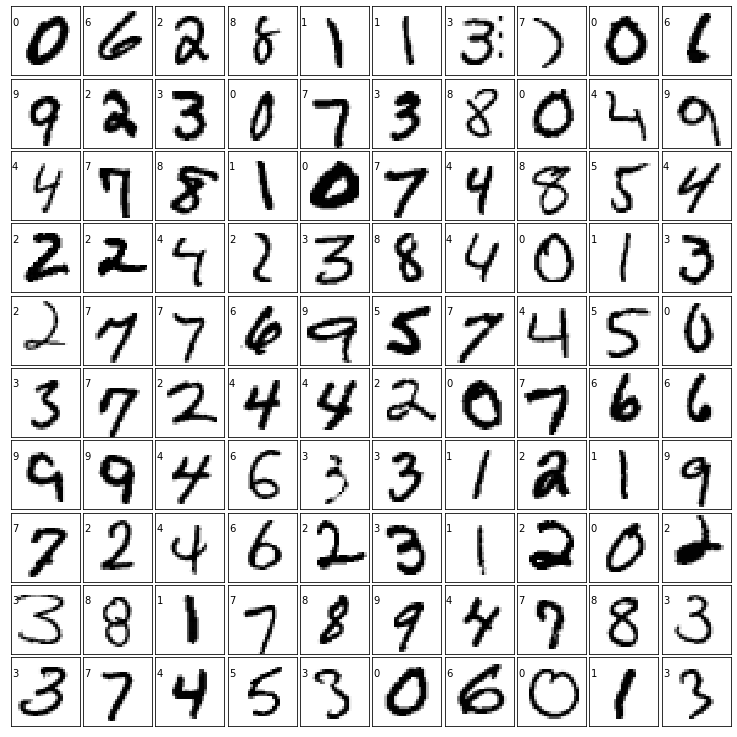

In [16]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10, 10))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(28,28), cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(y_test[i]))

## **Classify with MLP**

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier


# train the model
#clf = GaussianNB()
#clf = LinearDiscriminantAnalysis()
#clf = KNeighborsClassifier(5)
clf =  MLPClassifier(alpha=0.05, max_iter=10000,solver='adam', random_state=1,
                hidden_layer_sizes=[100, 100],early_stopping=True,
                verbose=10, tol=0.00001)

print(clf.fit(X_train, y_train))
#print(clf.feature_importances_)  

# use the model to predict the labels of the test data
predicted = clf.predict(X_test)
expected = y_test


print("Score train = ",clf.score(X_train, y_train))
print("Score test  = ",clf.score(X_test, y_test))



Iteration 1, loss = 0.45733581
Validation score: 0.938833
Iteration 2, loss = 0.20294116
Validation score: 0.956833
Iteration 3, loss = 0.16000369
Validation score: 0.963333
Iteration 4, loss = 0.13584308
Validation score: 0.964333
Iteration 5, loss = 0.12016317
Validation score: 0.971500
Iteration 6, loss = 0.10915117
Validation score: 0.971667
Iteration 7, loss = 0.10060867
Validation score: 0.973000
Iteration 8, loss = 0.09617373
Validation score: 0.970500
Iteration 9, loss = 0.08888252
Validation score: 0.974000
Iteration 10, loss = 0.08515417
Validation score: 0.976333
Iteration 11, loss = 0.08053905
Validation score: 0.972167
Iteration 12, loss = 0.07725563
Validation score: 0.974500
Iteration 13, loss = 0.07547377
Validation score: 0.975333
Iteration 14, loss = 0.07280702
Validation score: 0.975500
Iteration 15, loss = 0.07211874
Validation score: 0.973000
Iteration 16, loss = 0.07022077
Validation score: 0.975500
Iteration 17, loss = 0.06789569
Validation score: 0.976333
Iterat

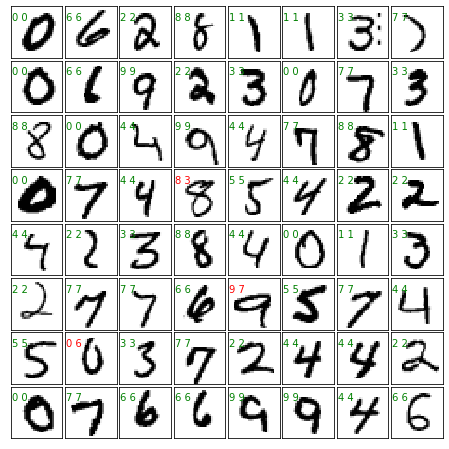

In [18]:
# Plot the prediction
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)


# plot the digits: each image is 28x28 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(28,28), cmap=plt.cm.binary,
              interpolation='nearest')

    # label the image with the target value
    if predicted[i] == expected[i]:
        ax.text(0, 7, str(expected[i])+" "+str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(expected[i])+" "+str(predicted[i]), color='red')

**Number of true matches:**

In [19]:
matches = (predicted == expected)
print(matches.sum())

9588


The total number of data points



In [20]:
print(len(matches))

10000


And now, the ratio of correct predictions



In [21]:
matches.sum() / float(len(matches))

0.9588

Print the classification report



In [22]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1018
           1       0.98      0.99      0.98      1131
           2       0.94      0.97      0.95      1010
           3       0.97      0.92      0.94      1003
           4       0.96      0.97      0.97       951
           5       0.94      0.95      0.95       896
           6       0.97      0.97      0.97      1002
           7       0.98      0.96      0.97      1067
           8       0.92      0.96      0.94       959
           9       0.94      0.95      0.95       963

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



# **Print the confusion matrix (expected true label vs. the reconstructed label)**



In [23]:
print(metrics.confusion_matrix(expected, predicted))

plt.show()

[[ 976    0   11    1    1    4   12    0    8    5]
 [   0 1115    3    1    2    1    0    2    4    3]
 [   4    1  976    3    4    4    4    4    9    1]
 [   2    6   19  925    0   22    1    5   19    4]
 [   2    4    3    0  919    0    6    2    2   13]
 [   2    2    3    8    2  851    7    1   15    5]
 [   7    2    4    0    6    6  969    1    7    0]
 [   1    1   11    2    6    2    0 1022    4   18]
 [   1    5    7    5    3    7    3    2  919    7]
 [   4    1    1   10   10    6    0    6    9  916]]
